# Milestone 2 Phase 1
___
___
Nama    : Ali Aufa Fakhri

Batch   : 019

---
---

# 1. Introduction

## Background

The airline industry is a critical component of the global transportation network, connecting people and goods across the world. However, flight delays and disruptions continue to pose significant challenges for both airlines and passengers. Delays can lead to increased costs, missed connections, decreased customer satisfaction, and operational inefficiencies. As a result, airlines are constantly seeking innovative solutions to predict and manage flight delays effectively.

To address this issue, airlines collect vast amounts of data related to flight schedules, performance, and external factors that may impact operations. This data includes information about the airline, flight number, departure and arrival airports, day of the week, and scheduled departure time. By leveraging this dataset, airlines can develop predictive models to forecast flight delays and take proactive measures to minimize disruptions.

## Problem Statement
Analyze the airline's comprehensive dataset and develop a predictive model to accurately forecast flight delays. The goal is to create a reliable tool that can predict whether a given flight will be delayed based on the scheduled departure information. Ensuring passenger satisfaction and managing expectations are critical, so minimizing false negatives should be important

By solving this problem, the airline company aims to proactively manage and minimize flight delays.

## Dataset

The provided dataset consists of 539,383 instances (rows) and 8 different features (columns). Here's a list of features and it's description:


Here's a markdown table explaining each variable in the dataset:

| Variable     | Description                                                |
|--------------|------------------------------------------------------------|
| id           | The unique identifier for each flight record                |
| Airline      | The airline associated with the flight                      |
| Flight       | The flight number                                          |
| AirportFrom  | The code for the departure airport                         |
| AirportTo    | The code for the arrival airport                           |
| DayOfWeek    | The day of the week when the flight is scheduled           |
| Time         | The departure time measured in minutes from midnight       |
| Length       | The duration of the flight in minutes                      |
| Delay        | The delay status of the flight (0 = not delayed, 1 = delayed) |

Each variable represents a specific aspect of the flight and its scheduled departure. The dataset contains information about the airline, flight number, departure and arrival airports, the day of the week when the flight is scheduled, and the scheduled departure time. These variables will be used as input features for predicting whether a given flight will be delayed.

---

# 2. Import Library

Library used in this assignment

In [1]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# feature engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler  # data skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# classification model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

# classification evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import pickle
import json
warnings.filterwarnings('ignore')

In [2]:
import os
print(os.cpu_count())

8


---

# 3. Data Loading


In [3]:
# input dataframe
df = pd.read_csv('h8dsft_P1M2__ali_aufa.csv')

## Data shape overview

In [4]:
# setting to view all columns
pd.set_option('display.max_columns', None)

In [5]:
# show first 10 rows
df.head(10)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
5,6,CO,1094,LAX,IAH,3,30,181,1
6,7,DL,1768,LAX,MSP,3,30,220,0
7,8,DL,2722,PHX,DTW,3,30,228,0
8,9,DL,2606,SFO,MSP,3,35,216,1
9,10,AA,2538,LAS,ORD,3,40,200,1


In [6]:
# show last 10 rows
df.tail(10)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
539373,539374,B6,480,LAX,BOS,5,1435,320,1
539374,539375,DL,2354,LAX,ATL,5,1435,255,0
539375,539376,FL,58,LAX,ATL,5,1435,250,0
539376,539377,B6,717,JFK,SJU,5,1439,220,1
539377,539378,B6,739,JFK,PSE,5,1439,223,1
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1
539382,539383,US,1442,LAX,PHL,5,1439,301,1


In [7]:
df.shape

(539383, 9)

the data consist of 539383 rows and 9 columns.

## Check the data type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [9]:
# create copy of dataframe
data = df.copy()

## Check Duplicates

In [10]:
# cek duplikat
data.duplicated().sum()

0

There is no data duplicates

## Check missing value

In [11]:
# cek missing value
data.isna().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

There is no missing value

## Differentiate between numerical and categorical columsn

In [12]:
print(data.columns.tolist())

['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'Delay']


In [13]:
#numerik
num_cols = ['Time', 'Length']
#kategori
cat_cols_object = ['Airline', 'AirportFrom', 'AirportTo'] 
cat_cols_number = ['Flight','DayOfWeek'] 
#exclude id becaus it's just unique value of each data
# exclude Delay because it's our target variable 

---

# 4. Exploratory Data Analysis


## Descriptive Statistics

In [14]:
data[num_cols].describe()

,Time,Length
count,539383.000000,539383.000000
mean,802.728963,132.202007
std,278.045911,70.117016
min,10.000000,0.000000
25%,565.000000,81.000000
50%,795.000000,115.000000
75%,1035.000000,162.000000
max,1439.000000,655.000000


We can see from the data that the average flight departs about 795 to 802 minutes from midnight, or approximately 1 PM. From flight length we can conclude that most flight is about 2 hours. The longest flight from the data is about 11 hour.

In [15]:
data[cat_cols_object].describe()

,Airline,AirportFrom,AirportTo
count,539383,539383,539383
unique,18,293,293
top,WN,ATL,ATL
freq,94097,34449,34440


There is 18 airlines and 293 airport. 

## Delay Ratio
See if there is any imbalance from the target data

In [16]:
# query jumlah default_payment_next_month
delay_count = data['Delay'].value_counts()
delay_count

0    299119
1    240264
Name: Delay, dtype: int64

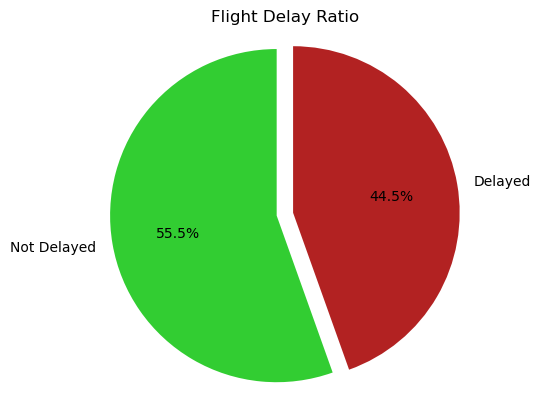

In [17]:
# Plotting pie chart
plt.pie(delay_count, 
        labels=['Not Delayed', 'Delayed'], startangle=90,
        colors=['limegreen','firebrick'],
        autopct='%1.1f%%', explode=[0,0.1])
plt.axis('equal')
plt.title('Flight Delay Ratio')

plt.show()

The data seems balanced between Delayed and not delayed. It seems that 44.5% of flights from the data are delayed flights.

## Categorical Data Ratio

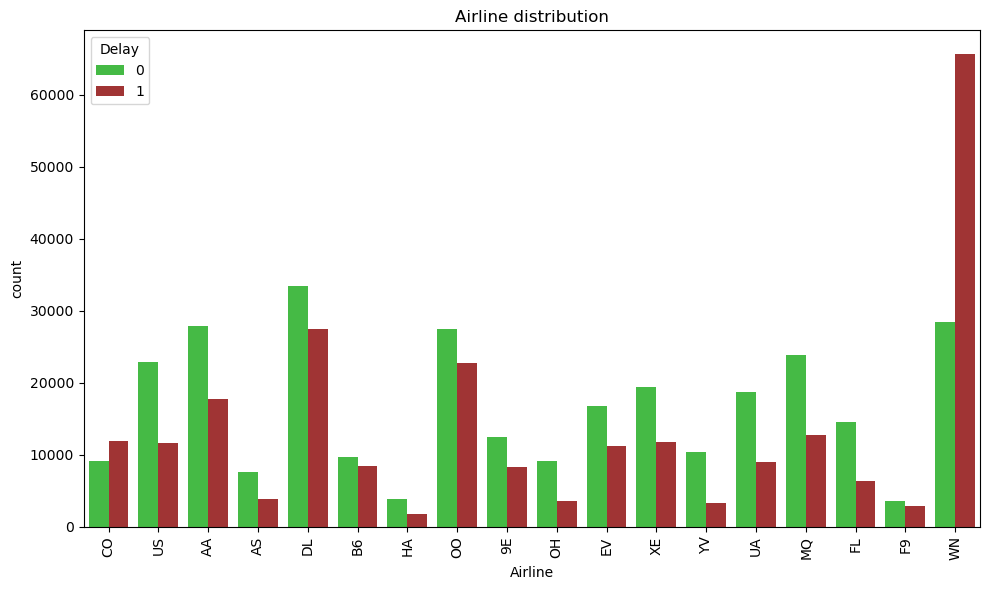

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='Airline', hue='Delay', palette=['limegreen', 'firebrick'])
ax.set_title('Airline distribution')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-labels by 90 degrees
plt.tight_layout()
plt.show()

These airline have more delayed flights than not delayed:
- Continental Airlines (CO)
- Southwest Airlines (WN)

Airline with most flight is Southwest Airlines, airline with most not delayed flight is Delta Airlines (DL), and some airlines with lowest delay ratio seems to be US Airways (US), Hawaiian Airlines (HA), PSA Airlines (OH), Mesa Airlines(YV), and AirTran Airways(FL).


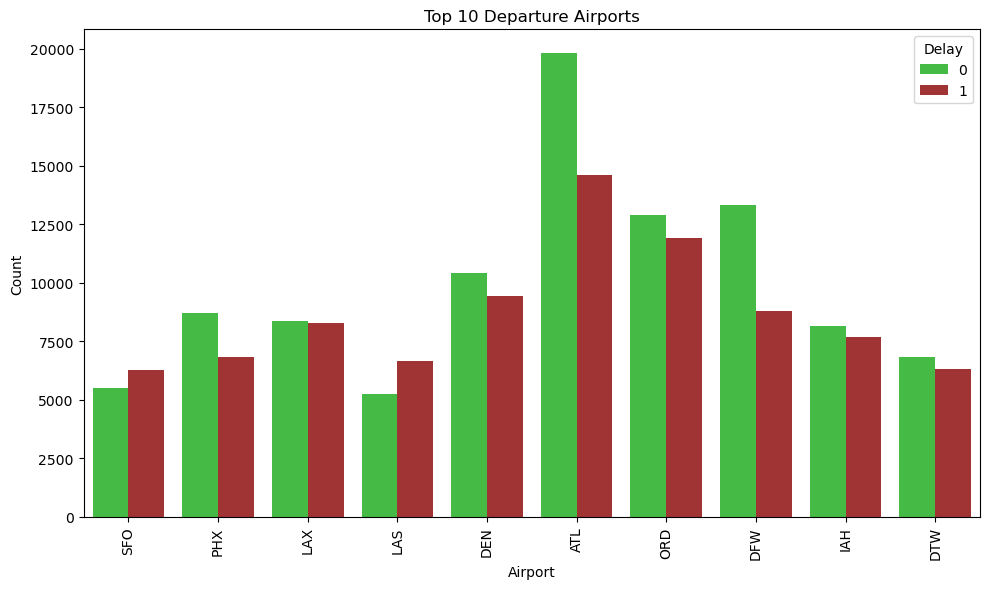

In [19]:
top_airports = data['AirportFrom'].value_counts().nlargest(10).index
top_airport_data = data[data['AirportFrom'].isin(top_airports)]

plt.figure(figsize=(10, 6))
sns.countplot(data=top_airport_data, x='AirportFrom', hue='Delay', palette=['limegreen', 'firebrick'])
plt.title('Top 10 Departure Airports')
plt.xlabel('Airport')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Most flights are from Hartsfield-Jackson Atlanta International Airport - Georgia (ATL)

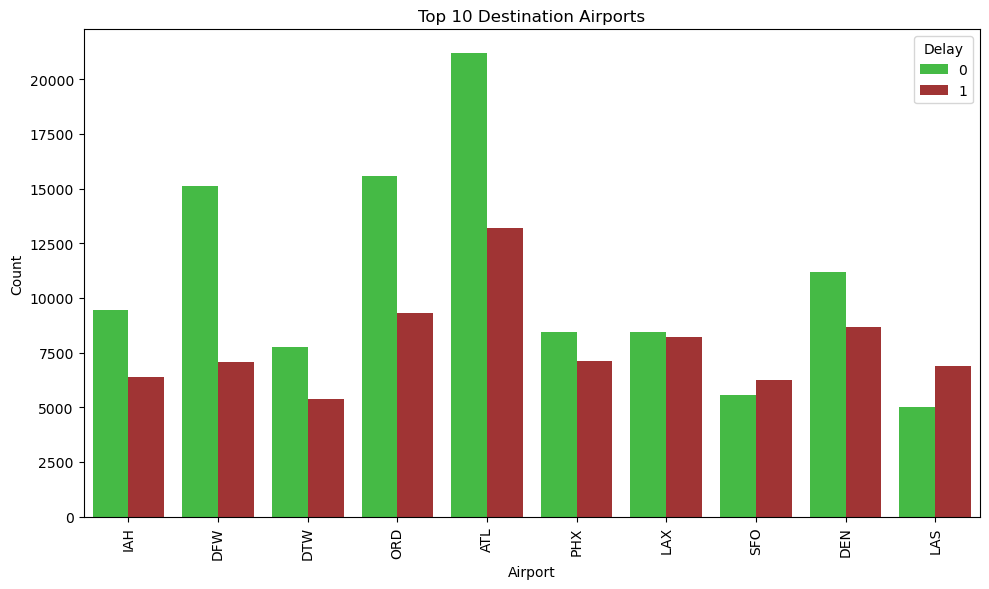

In [20]:
top_airports = data['AirportTo'].value_counts().nlargest(10).index
top_airport_data = data[data['AirportTo'].isin(top_airports)]

plt.figure(figsize=(10, 6))
sns.countplot(data=top_airport_data, x='AirportTo', hue='Delay', palette=['limegreen', 'firebrick'])
plt.title('Top 10 Destination Airports')
plt.xlabel('Airport')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Most destination also seems to be Hartsfield-Jackson Atlanta International Airport - Georgia. we can conclude that ATL is the busiest airport.

<Axes: xlabel='DayOfWeek', ylabel='count'>

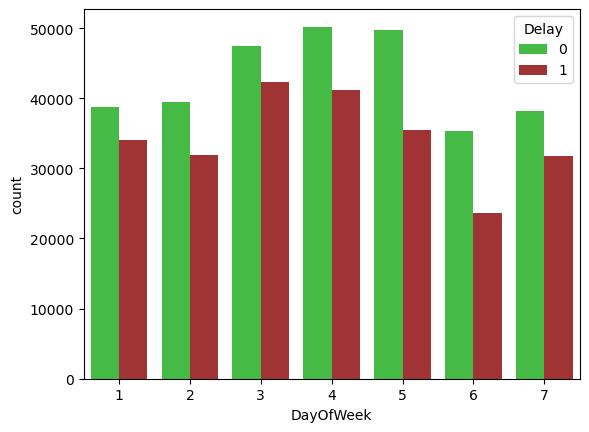

In [21]:
sns.countplot(data=data, x='DayOfWeek', hue='Delay', palette=['limegreen', 'firebrick'])

There is very little difference of flights on each day, but we can see that we have more flights on wednesday to friday. Also we have less delayed flights on friday.

In [22]:
data['Flight'].nunique()

6585

There are 6585 unique flight number.

## Numeric data distribution

<Axes: xlabel='Time', ylabel='Count'>

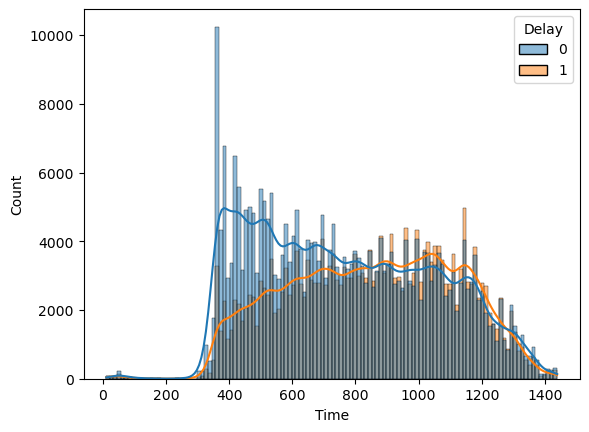

In [23]:
sns.histplot(data=data, x='Time', hue='Delay', kde=True)

It seems that we have different distribution for delayed and not delayed flights. Most flights depart in the morning between 6 to 8 AM (360 minutes to 500 from midnight) but most delayed flight happens on afternoon to evening flights.

<Axes: xlabel='Length', ylabel='Count'>

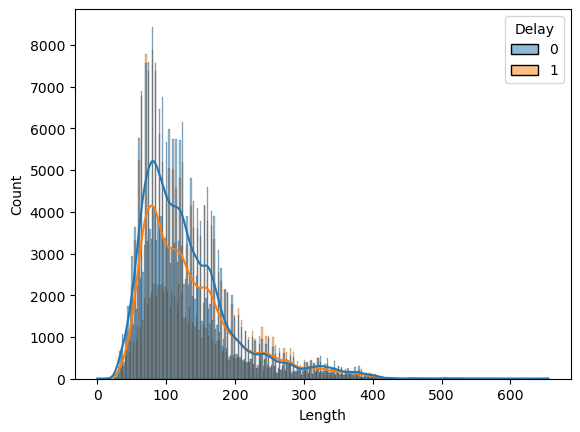

In [24]:
sns.histplot(data=data, x='Length', hue='Delay', kde=True)

The distribution of flight length are the same shape.

The ddistribution of Length seems to be skewed and for distribution of Time doesn't seem to be normal either.

---

# 5. Feature Engineering

In [25]:
# membuat salinan data untuk feature engineering
data2 = data.copy()

## Split feature `X` and target `y`

In [26]:
#split Fitur dan target
X= data2.drop(['id', 'Delay'], axis=1)
y= data2['Delay']

## Split dataset Train and Test

The dataset is separated into a train dataset for model training, and a test dataset for model testing. Separation is done with a ratio of 80% train and 20% test.

In [27]:
# Splitting data kepada data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,
                                                    stratify= y)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

Train Size : (431506, 7)
Test Size : (107877, 7)


In [28]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

## Handling Outlier

In [29]:
print(num_cols)

['Time', 'Length']


### Check percentage of outlier

In [30]:
# IQR
q1 = X_train[num_cols].quantile(0.25)
q3 = X_train[num_cols].quantile(0.75)
iqr = q3 - q1

# lower dan upper limit
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

# menghitung persentase outlier
outlier_percentages = ((X_train[num_cols] < lower_threshold) | (X_train[num_cols] > upper_threshold)).mean() * 100

print('outlier percentage:')
print(outlier_percentages)

outlier percentage:
Time      0.000000
Length    4.748022
dtype: float64


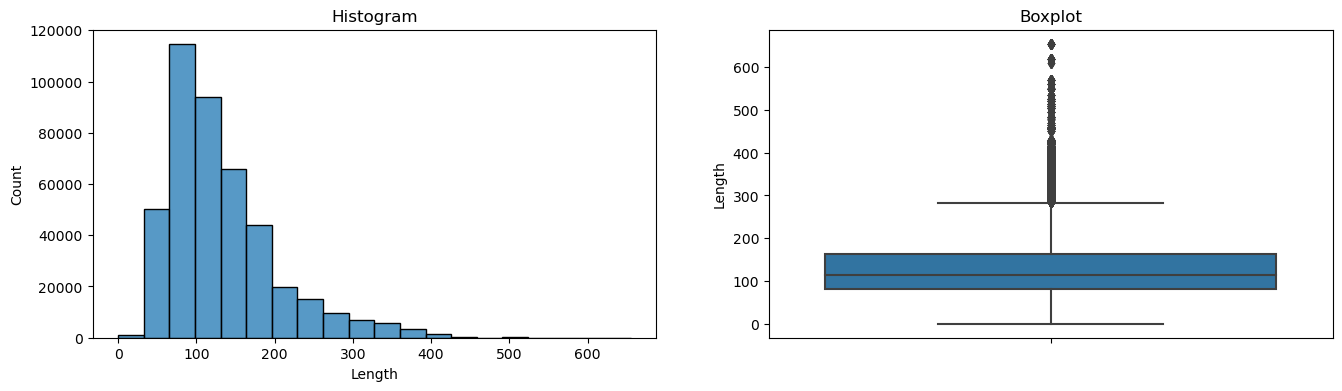

In [31]:
plt.figure(figsize=(16, 4))

 # Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['Length'], bins=20)
plt.title('Histogram')

    # Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['Length'])
plt.title('Boxplot')

plt.show()

Outliers value seems to make sense because there are more that 10 hours flight between America. Since there are only 4% of outliers and the outliers is natural, these outliers won't be handled.

## Split numeric and categorical features
Numerical and categorical features has different ways of preprocessing, so we split them

In [32]:
# pemisahan Train-Set dan Test-Set berdasarkan tipe kolom

X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

X_train_cat_num = X_train[cat_cols_number]
X_test_cat_num = X_test[cat_cols_number]

X_train_cat_obj = X_train[cat_cols_object]
X_test_cat_obj = X_test[cat_cols_object]

## Feature Scaling

Before scaling, we check that the data is normally distributed or not using skewness. If the skewness value is between -0.5 to 0.5 then the distribution is normal, outside that value means it is not normal.

In [33]:
print('skewness Time:', X_train['Time'].skew())
print('skewness Length:', X_train['Length'].skew())

skewness Time: 0.07886892545374338
skewness Length: 1.493195712651307


Time seems to be normally distributed and length is skewed. We will only use standard scaler.

In [34]:
#scaling numeric features with minmax scaler
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

# dataframe to data array
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = num_cols)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = num_cols)

# reset index dataframe
X_train_num_scaled.reset_index(drop = True, inplace = True)
X_test_num_scaled.reset_index(drop = True, inplace = True)


X_train_num_scaled.head()

,Time,Length
0,-1.051948,-0.716025
1,1.451163,-0.359207
2,1.861155,1.182249
3,0.512496,-1.115662
4,-0.278717,-0.901571


## Feature Encoding
In this section we will encode categorical column. The categorical feature only have nominal data, but since there is 293 different airport for departure and destination it will be hard for the model to use one hot encoder. 

When dealing with categorical columns that have a large number of unique values, using one-hot encoding can lead to a significant increase in the dimensionality of the dataset. This can result in a more complex and computationally expensive model. Therefore, inthis case we will use target encoder which replaces each category with the mean target value of the corresponding category.

In [35]:
# Create an instance of TargetEncoder
encoder = ce.TargetEncoder(cols=cat_cols_object)

# Fit the encoder on the categorical columns and target values
encoder.fit(X_train_cat_obj, y_train)

# Apply the target encoding transformation to the categorical columns
X_train_cat_obj_encoded = encoder.transform(X_train_cat_obj)
X_test_cat_obj_encoded = encoder.transform(X_test_cat_obj)

# dataframe to data array
X_train_cat_obj_encoded = pd.DataFrame(X_train_cat_obj_encoded, columns = cat_cols_object)
X_test_cat_obj_encoded = pd.DataFrame(X_test_cat_obj_encoded, columns = cat_cols_object)

# reset index dataframe
X_train_cat_obj_encoded.reset_index(drop = True, inplace = True)
X_test_cat_obj_encoded.reset_index(drop = True, inplace = True)

X_train_cat_obj_encoded.head()

,Airline,AirportFrom,AirportTo
0,0.334873,0.315586,0.394413
1,0.242277,0.308642,0.454976
2,0.341466,0.423311,0.442436
3,0.380153,0.484672,0.315634
4,0.380153,0.450247,0.435904


In [36]:
#Combining numerical and categorical data

# Data Train
X_train_manual = pd.concat([X_train_cat_num, X_train_num_scaled, X_train_cat_obj_encoded], axis = 1)

# Data Test
X_test_manual = pd.concat([X_test_cat_num, X_test_num_scaled, X_test_cat_obj_encoded], axis = 1)

In [37]:
X_train_manual

,Flight,DayOfWeek,Time,Length,Airline,AirportFrom,AirportTo
0,2024,5,-1.051948,-0.716025,0.334873,0.315586,0.394413
1,2895,7,1.451163,-0.359207,0.242277,0.308642,0.454976
2,731,5,1.861155,1.182249,0.341466,0.423311,0.442436
3,2442,3,0.512496,-1.115662,0.380153,0.484672,0.315634
4,2776,7,-0.278717,-0.901571,0.380153,0.450247,0.435904
...,...,...,...,...,...,...,...
431501,476,7,0.846964,-0.730298,0.326272,0.478742,0.384230
431502,1029,1,0.016190,-0.344934,0.449932,0.324778,0.382816
431503,673,3,-0.217578,0.382976,0.326272,0.481318,0.321288
431504,3,4,-1.267733,-1.030025,0.697105,0.711211,0.624150


In [38]:
print('X_train shape: ',X_train_manual.shape[0])
print('X_test shape: ',X_test_manual.shape[0])
print('y_train shape: ',y_train.shape[0])
print('y_test shape: ',X_test.shape[0])

X_train shape:  431506
X_test shape:  107877
y_train shape:  431506
y_test shape:  107877


## Pipeline
What we have done for preprocessing so far:
1. Scaling numeric features with standard scaler
2. Encoding categorical features with target encoder

We will build preprocessing pipeline that do the things above

In [39]:
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('target_encode', encoder, cat_cols_object),
        ('scale', StandardScaler(), num_cols)
    ], remainder='passthrough')
# Define the pipeline
preprocess_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])
# Fit pipeline with X_train
preprocess_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('target_encode',
                                                  TargetEncoder(cols=['Airline',
                                                                      'AirportFrom',
                                                                      'AirportTo']),
                                                  ['Airline', 'AirportFrom',
                                                   'AirportTo']),
                                                 ('scale', StandardScaler(),
                                                  ['Time', 'Length'])]))])

In [40]:
# # Numeric pipeline
# numeric_pipeline = Pipeline([
#     ('winsorize', Winsorizer(capping_method='iqr', tail='both')),
#     ('scale', StandardScaler())
# ])

# # ColumnTransformer
# preprocessor = ColumnTransformer([
#     ('numeric', numeric_pipeline, num_cols),
#     ('categorical', encoder, cat_cols_object)
# ], remainder='passthrough')

# # Combine numeric and categorical pipelines
# preprocess_pipeline = Pipeline([
#     ('preprocessor', preprocessor)
# ])

# # Fit pipeline with X_train
# preprocess_pipeline.fit(X_train, y_train)

In [41]:
X_train_pipeline = preprocess_pipeline.transform(X_train)

The value of pipeline transform is the same as manual transform, so the pipeline works. We will use the pipeline for data inference later.

In [42]:
X_test_pipeline = preprocess_pipeline.transform(X_test)

In [43]:
# See if the value is the same as manual transform
X_train_pipeline_df = pd.DataFrame(X_train_pipeline, columns=['Airline', 'AirportFrom', 'AirportTo', 'Time', 'Length', 'Flight', 'DayOfWeek'])
X_test_pipeline_df = pd.DataFrame(X_test_pipeline, columns=['Airline', 'AirportFrom', 'AirportTo', 'Time', 'Length', 'Flight', 'DayOfWeek'])
X_train_pipeline_df

,Airline,AirportFrom,AirportTo,Time,Length,Flight,DayOfWeek
0,0.334873,0.315586,0.394413,-1.051948,-0.716025,2024.0,5.0
1,0.242277,0.308642,0.454976,1.451163,-0.359207,2895.0,7.0
2,0.341466,0.423311,0.442436,1.861155,1.182249,731.0,5.0
3,0.380153,0.484672,0.315634,0.512496,-1.115662,2442.0,3.0
4,0.380153,0.450247,0.435904,-0.278717,-0.901571,2776.0,7.0
...,...,...,...,...,...,...,...
431501,0.326272,0.478742,0.384230,0.846964,-0.730298,476.0,7.0
431502,0.449932,0.324778,0.382816,0.016190,-0.344934,1029.0,1.0
431503,0.326272,0.481318,0.321288,-0.217578,0.382976,673.0,3.0
431504,0.697105,0.711211,0.624150,-1.267733,-1.030025,3.0,4.0


## Feature Selection

In this section the features that affect the target categorization will be selected. The feature selection technique used is chi-square for categorical features and ANOVA for numerical features. These two features were chosen because the target to be searched for is categorical data.

For chi-square tests, a p-value less than 0.05 indicates that there is a significant association between the categorical variables being compared. In this case, a p-value below 0.05 suggests that the variables are not independent and may be considered important in relation to each other.

For ANOVA (Analysis of Variance) tests, a p-value less than 0.05 suggests that there is a significant difference between the means of the groups being compared. In this case, a p-value below 0.05 indicates that there is evidence of a statistically significant difference among the groups, and the factor being tested may be considered important in explaining the variation in the dependent variable.

In [44]:
cat_cols = ['Airline', 'AirportFrom', 'AirportTo','Flight','DayOfWeek']

# Select categorical features
X_train_categorical = X_train_manual[cat_cols]

# Select numerical features
X_train_numerical = X_train_manual[num_cols]

# Apply feature selection to categorical features using chi-square
selector_categorical = SelectKBest(score_func=chi2, k='all')
selector_categorical.fit(X_train_categorical, y_train)

df_scores_categorical = pd.DataFrame({'Feature': X_train_categorical.columns,
                                      'Score': selector_categorical.scores_,
                                      'p-value': selector_categorical.pvalues_.round(4)})

df_scores_categorical = df_scores_categorical.sort_values(by='Score', ascending=False)

# Apply feature selection to numerical features using ANOVA F-value
selector_numerical = SelectKBest(score_func=f_classif, k='all')
selector_numerical.fit(X_train_numerical, y_train)

df_scores_numerical = pd.DataFrame({'Feature': X_train_numerical.columns,
                                    'Score': selector_numerical.scores_,
                                    'p-value': selector_numerical.pvalues_.round(4)})

df_scores_numerical = df_scores_numerical.sort_values(by='Score', ascending=False)

# Merge the results
df_scores = pd.concat([df_scores_categorical, df_scores_numerical], ignore_index=True)

df_scores

,Feature,Score,p-value
0,Flight,1.646719e+06,0.0
1,Airline,1.192823e+03,0.0
2,DayOfWeek,2.910515e+02,0.0
3,AirportFrom,2.505658e+02,0.0
4,AirportTo,1.871921e+02,0.0
5,Time,9.972446e+03,0.0
6,Length,7.267386e+02,0.0


In [45]:
print(X_train.columns.tolist())

['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length']


From the table (chi-square and ANOVA), features that have a p-value of <0.05 are considered important, hence we will use all of these features.



---

# 6. Model Definition

In [46]:
# Definisi model logistic regression
log_model = LogisticRegression()

# Definisi model KNN
knn_model = KNeighborsClassifier()

# Definisi model Decision Tree
destree_model = DecisionTreeClassifier()

# Definisi mdoel Random Forest
rf_model = RandomForestClassifier()

# Definisi model lainnya
gbc_model = GradientBoostingClassifier()

---

# 7. Model Training

## Cross Validation
Each model will be cross-validated 5 times. The model with the best mean cross validation results will be hyperparameter tunning. The metrics used to evaluate is recall.

In [47]:
# logistic regression
score_log = cross_val_score(log_model, X_train_pipeline, y_train, cv=5, scoring='recall',n_jobs=-1)

In [48]:
# Decision tree
score_dt = cross_val_score(destree_model, X_train_pipeline, y_train, cv=5, scoring='recall',n_jobs=-1)

In [49]:
#Random Forest
score_rf = cross_val_score(rf_model, X_train_pipeline, y_train, cv=5, scoring='recall',n_jobs=-1)

In [50]:
#Gradient Boosting
score_gbc = cross_val_score(gbc_model, X_train_pipeline, y_train, cv=5, scoring='recall',n_jobs=-1)

In [51]:
# knn
score_knn = cross_val_score(knn_model, X_train_pipeline, y_train, cv=5, scoring='recall',n_jobs=-1)

In [52]:
#Logistic Regression
print('Logistic Regression')
print('recall Score - Mean - Cross Validation: ', round(score_log.mean(),3))
print('recall Score - Std - Cross Validation: ', round(score_log.std(),3))

Logistic Regression
recall Score - Mean - Cross Validation:  0.517
recall Score - Std - Cross Validation:  0.032


In [53]:
#knn
print('knn')
print('recall Score - Mean - Cross Validation: ', round(score_knn.mean(),3))
print('recall Score - Std - Cross Validation: ', round(score_knn.std(),3))

knn
recall Score - Mean - Cross Validation:  0.513
recall Score - Std - Cross Validation:  0.002


In [54]:
#Decision Tree
print('Decision Tree')
print('recall Score - Mean - Cross Validation: ', round(score_dt.mean(),3))
print('recall Score - Std - Cross Validation: ', round(score_dt.std(),3))

Decision Tree
recall Score - Mean - Cross Validation:  0.483
recall Score - Std - Cross Validation:  0.002


In [55]:
#Random Forest
print('Random Forest')
print('recall Score - Mean - Cross Validation: ', round(score_rf.mean(),3))
print('recall Score - Std - Cross Validation: ', round(score_rf.std(),3))

Random Forest
recall Score - Mean - Cross Validation:  0.555
recall Score - Std - Cross Validation:  0.002


In [56]:
#Gradient Boosting Classifier
print('Gradient Boosting Classifier')
print('recall Score - Mean - Cross Validation: ', round(score_gbc.mean(),3))
print('recall Score - Std - Cross Validation: ', round(score_gbc.std(),3))

Gradient Boosting Classifier
recall Score - Mean - Cross Validation:  0.457
recall Score - Std - Cross Validation:  0.001


In [57]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN']
recalls_mean = [score_log.mean(), score_dt.mean(), score_rf.mean(), score_gbc.mean(), score_knn.mean()]
recalls_std = [score_log.std(), score_dt.std(), score_rf.std(), score_gbc.std(), score_knn.std()]

summary_table = pd.DataFrame({'Model': models, 'Recall Mean (Cross Validation)': recalls_mean, 'Recall Std (Cross Validation)': recalls_std})
summary_table = summary_table.round(3)
summary_table

,Model,Recall Mean (Cross Validation),Recall Std (Cross Validation)
0,Logistic Regression,0.517,0.032
1,Decision Tree,0.483,0.002
2,Random Forest,0.555,0.002
3,Gradient Boosting,0.457,0.001
4,KNN,0.513,0.002


**Random forest** yields the best **recall** with validation score of 56%. We will then do a hyperparameter tuning on random forest model.

## Hyperparameter tuning

### Random Forest

In [58]:
# Definisi parameter
grid_parameters = {'min_samples_leaf': [1, 2, 4], 
                   'max_depth': [None, 1, 2], 
                   'criterion': ['gini', 'entropy'], 
                   'min_samples_split': [2, 4, 6],
                   'n_estimators': [5, 10, 20]}
# verbose = 1 akan tampilkan fitting dan param, verbose=2 lebih komplit lagi,verbose 3 ada score accuracy tiap cv
# return_train_score =True agar bisa di cetak hasil score Train dan rata2 scorenya train, 
# kalau False dia hanya score testnya saja
grid = GridSearchCV(estimator=rf_model, param_grid=grid_parameters,verbose=3, refit=True,scoring ='recall', 
                    cv = 5, return_train_score=True, n_jobs=-1
                    ) #multi class tidak support roc_auc
grid.fit(X_train_pipeline,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [5, 10, 20]},
             return_train_score=True, scoring='recall', verbose=3)

In [59]:
# Menampilkan hasi perhitungan gridsearch
dt_hyperparam_df = pd.DataFrame(grid.cv_results_)
dt_hyperparam_df.sort_values("mean_test_score", ascending=False)\
[["params", "mean_test_score", "mean_train_score", "std_test_score", "std_train_score",'rank_test_score','mean_score_time']]

,params,mean_test_score,mean_train_score,std_test_score,std_train_score,rank_test_score,mean_score_time
8,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.558532,0.760440,0.002373,0.000540,1,3.747145
17,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.558189,0.741698,0.001895,0.000668,2,3.640183
98,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.557653,0.744247,0.001682,0.000703,3,3.596503
16,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.557429,0.736155,0.001843,0.000519,4,1.904760
11,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.557387,0.755898,0.002507,0.000601,5,3.737174
...,...,...,...,...,...,...,...
39,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.202438,0.202890,0.108174,0.109085,158,0.290454
51,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.193719,0.194146,0.067932,0.068468,159,0.281438
45,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.191669,0.191797,0.137118,0.137245,160,0.284012
117,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.157556,0.157620,0.132200,0.131808,161,0.325502


In [60]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_index_)

RandomForestClassifier(min_samples_split=6, n_estimators=20)
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 20}
8


From the results of gridsearch the best parameter that can be used is `{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 20}`. We will use this parameters and evaluate our model.

# 8. Model Evaluation

## Random Forest

In [61]:
# define model with best parameter
best_rf= RandomForestClassifier(criterion= 'entropy', max_depth= None, 
                                min_samples_leaf= 1, min_samples_split= 6, 
                                n_estimators= 20)
best_rf.fit(X_train_pipeline,y_train)

print(best_rf)

RandomForestClassifier(criterion='entropy', min_samples_split=6,
                       n_estimators=20)


In [62]:
# Evaluate with classification report
train_predict = best_rf.predict(X_train_pipeline)
test_predict = best_rf.predict(X_test_pipeline)

print('Training score: {:.4f}'.format(best_rf.score(X_train_pipeline, y_train)))
print(classification_report(y_train,train_predict))
print('Test score: {:.4f}'.format(best_rf.score(X_test_pipeline, y_test)))
print(classification_report(y_test,test_predict))

Training score: 0.8054
              precision    recall  f1-score   support

           0       0.81      0.85      0.83    239295
           1       0.80      0.75      0.77    192211

    accuracy                           0.81    431506
   macro avg       0.80      0.80      0.80    431506
weighted avg       0.81      0.81      0.80    431506

Test score: 0.6365
              precision    recall  f1-score   support

           0       0.66      0.70      0.68     59824
           1       0.60      0.56      0.58     48053

    accuracy                           0.64    107877
   macro avg       0.63      0.63      0.63    107877
weighted avg       0.63      0.64      0.64    107877



Based on the provided classification report, the model achieved the following scores:

Training Set

- Precision: 0.81 (for class 0) and 0.80 (for class 1)
- Recall: 0.85 (for class 0) and 0.75 (for class 1)
- F1-score: 0.83 (for class 0) and 0.77 (for class 1)
- Accuracy: 0.81

Test Set

- Precision: 0.66 (for class 0) and 0.60 (for class 1)
- Recall: 0.70 (for class 0) and 0.56 (for class 1)
- F1-score: 0.68 (for class 0) and 0.58 (for class 1)
- Accuracy: 0.64

The macro average and weighted average metrics provide an overall summary of the model's performance across both classes. From the scores, it appears that the model is performing better on class 0 (Not Delay) compared to class 1 (Delay) in terms of precision, recall, and F1-score.

By comparing the Training score and Test score the model seems overfit because Training set has far higher score than Test set.

<Axes: >

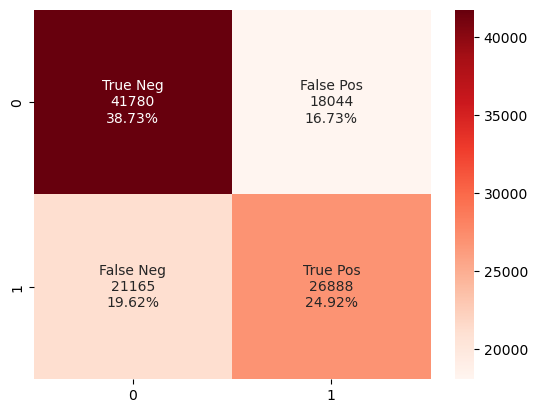

In [63]:
# Evaluasi dengan confusion matrix
confusion = confusion_matrix(y_test, best_rf.predict(X_test_pipeline))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in confusion.flatten()]
percentages = ['{0:.2%}'.format(value) for value in confusion.flatten()/np.sum(confusion)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion,annot = labels,cmap = 'Reds',fmt ='')

Based on the provided confusion matrix percentages, we can draw the following conclusions:

1. True Negative (TN): The model correctly predicted 38.7% of the instances as negative (not delayed flights).
2. False Positive (FP): The model incorrectly predicted 16.7% of the instances as positive (delayed flights) when they were actually negative.
3. False Negative (FN): The model incorrectly predicted 19.6% of the instances as negative when they were actually positive (delayed flights).
4. True Positive (TP): The model correctly predicted 24.9% of the instances as positive (delayed flights).

Based on these results, we can make the following observations:

1. The model has a relatively higher percentage of false negatives (19.6%) compared to false positives (16.7%). This means that the model is more likely to incorrectly predict a flight as not delayed when it is actually delayed.
2. The true positive rate (24.9%) indicates the model's ability to correctly identify delayed flights. However, it is relatively low compared to the false negative rate, suggesting that the model may miss a significant number of delayed flights.
3. The true negative rate (38.7%) indicates the model's ability to correctly identify not delayed flights. It is relatively higher than the false positive rate (16.7%), indicating that the model performs better in predicting not delayed flights.

In conclusion, the model shows a tendency to be conservative in predicting delayed flights, resulting in a higher false negative rate. Further improvements are needed to increase the model's ability to accurately identify delayed flights.

# 9. Model Saving

In [64]:
# Combine preprocessing and model in a pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_rf)
])

In [65]:
# Save the combined pipeline
with open('pipeline.pkl', 'wb') as file:
    pickle.dump(final_pipeline, file)

# Save the list of numeric columns
with open('num_cols.json', 'w') as file:
    json.dump(num_cols, file)

# Save the list of categorical columns (object type)
with open('cat_cols_object.json', 'w') as file:
    json.dump(cat_cols_object, file)

# Save the list of categorical columns (number type)
with open('cat_cols_number.json', 'w') as file:
    json.dump(cat_cols_number, file)

# 10. Model Inference

Model inference was performed on the notebook [model_inference.ipynb]('https://github.com/H8-Assignments-Bay/p1-ftds019-rmt-m2-aliaufa/blob/main/model_inference.ipynb'). The model used is random forest because the model evaluation results are the best of all the models tested. The parameters used are the best parameters from the Gridsearch results.

After doing the inference model, it can be seen that the model can make predictions. We will deploy the model on huggingface

# 11. Conclusion

Based on the analysis and model evaluation, the following conclusions can be drawn:

1. Flight Departure Time: Most flights depart between 6 to 8 AM, with a peak around 1 PM. Afternoon to evening flights have a higher likelihood of experiencing delays.

2. Flight Duration: The majority of flights have a duration of approximately 2 hours, with some outliers representing long-haul flights lasting over 10 hours.

3. Airlines and Delays: Continental Airlines (CO) and Southwest Airlines (WN) have a higher proportion of delayed flights. Southwest Airlines has the highest number of total flights, while Delta Airlines (DL) has the highest number of not delayed flights. Airlines with the lowest delay ratios include US Airways (US), Hawaiian Airlines (HA), PSA Airlines (OH), Mesa Airlines (YV), and AirTran Airways (FL).

4. Busiest Airport: Hartsfield-Jackson Atlanta International Airport (ATL) in Georgia appears to be the busiest airport, with the most frequent destinations.

5. Weekly Distribution: Wednesday to Friday observe higher flight frequencies compared to other days. Additionally, Friday experiences fewer delayed flights.

6. Model Evaluation: The Random Forest model yielded the best recall with a validation score of 56%. However, the model demonstrates signs of overfitting, as the training set scores are significantly higher than the test set scores.

7. Performance Metrics: The model performs better on class 0 (Not Delay) compared to class 1 (Delay) in terms of precision, recall, and F1-score. The test set scores indicate lower overall performance compared to the training set, suggesting the need for addressing overfitting.

the model shows a tendency to be conservative in predicting delayed flights, resulting in a higher false negative rate. Further improvements are needed to increase the model's ability to accurately identify delayed flights.

To address the overfitting issue, various approaches can be considered, such as different feature engineering, regularization techniques, and potentially acquiring more diverse data.

